<a href="https://colab.research.google.com/github/rifkifakhrudin2004/PCVKSemester5/blob/main/modul3_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


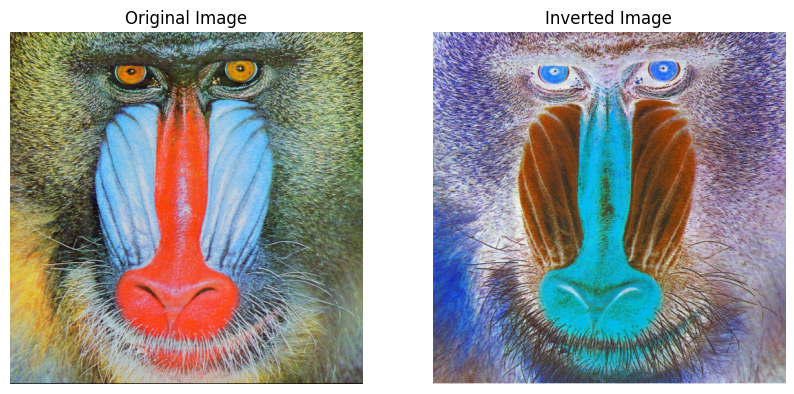

In [ ]:
#Tugas 1
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image from the file path
img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')

# Convert the image to RGB (OpenCV uses BGR by default)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Invert the colors
img_inverted = cv.bitwise_not(img_rgb)

# Display the original and the inverted image side by side using Matplotlib
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Display the inverted image
plt.subplot(1, 2, 2)
plt.imshow(img_inverted)
plt.title('Inverted Image')
plt.axis('off')

plt.show()


Mengubah tingkat kecerahan dan kontras citra
--------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


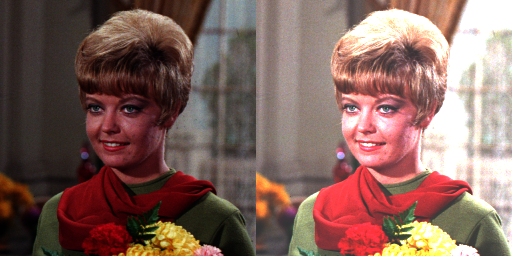

In [ ]:
#Tugas 2
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan dan kontras citra')
print('--------------------------------')

# Input for brightness level
try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
except ValueError:
    print('Error, not a number')
    brightness = 0  # Default to 0 if input is not valid

# Input for contrast level
try:
    contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
    if contrast < 1.0 or contrast > 3.0:
        raise ValueError
except ValueError:
    print('Error, not a valid contrast value')
    contrast = 1.0  # Default to 1.0 if input is not valid

# Load the original image
original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# Apply brightness and contrast adjustment per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

# Alternative approach without the loop
# brightness_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

# Concatenate the original and adjusted images for comparison
final_frame = cv.hconcat([original, brightness_image])

# Display the final image
cv2_imshow(final_frame)


Mengubah tingkat kecerahan citra dengan Transformasi Log
---------------------------------------------------------
Masukkan nilai kecerahan: 40


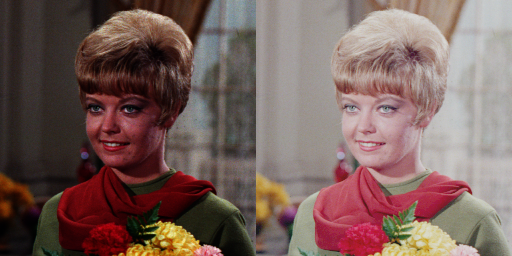

In [ ]:
#Tugas 3
# Logarithmic brightness
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('---------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1+original[y,x,c])),0,255)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

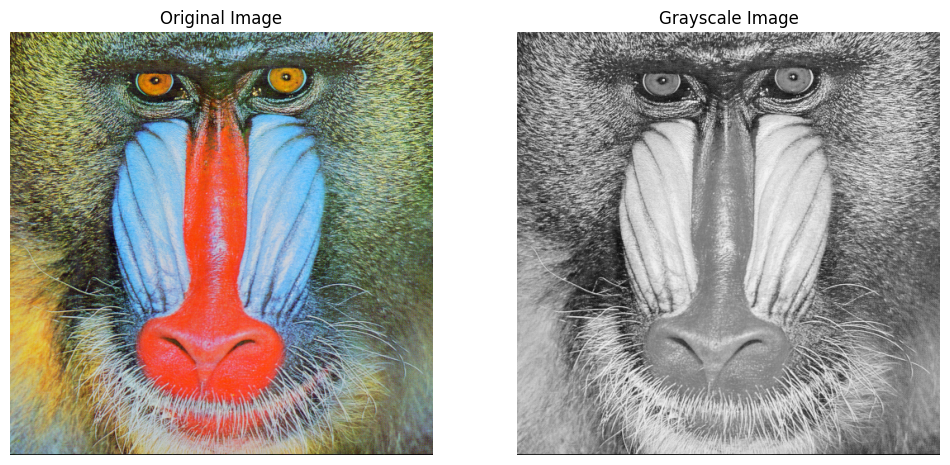

In [ ]:
#Tugas 4
#Averaging
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')

# Convert the image from BGR to RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Calculate the grayscale image by averaging the R, G, B channels
GrayAvg = np.mean(img_rgb, axis=-1).astype(np.uint8)

# Display the original image and the grayscale image side by side
f, axarr = plt.subplots(1, 2, figsize=(12, 6))

# Show the original image
axarr[0].imshow(img_rgb)
axarr[0].set_title('Original Image')
axarr[0].axis('off')

# Show the grayscale image
axarr[1].imshow(GrayAvg, cmap='gray')
axarr[1].set_title('Grayscale Image')
axarr[1].axis('off')

plt.show()


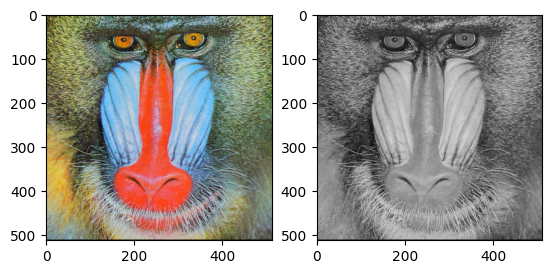

In [ ]:
#tugas4
#Lightness
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img_light = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
img_light[:] = np.max(img_light,axis=-1,keepdims=10)/2+np.min(img_light,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)


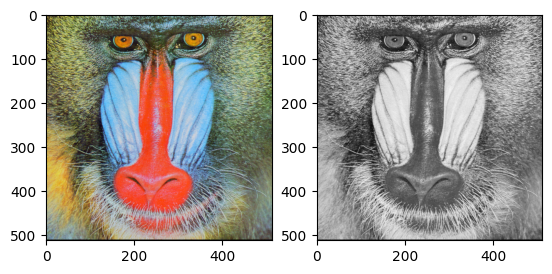

In [ ]:
#tugas 4
#Luminence
image_lum = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
R, G, B = image_lum[:,:,0], image_lum[:,:,1], image_lum[:,:,2]
gray_image_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_image_lum, cmap='gray')

Grayscale


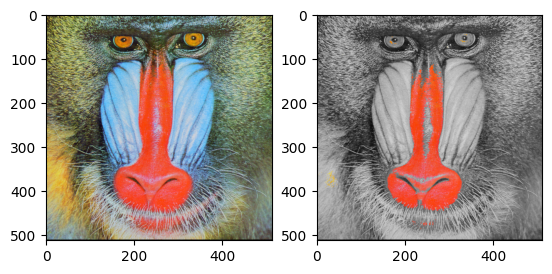

In [ ]:
#Tugas 5
#Ubah warna lain menjadi grayscale

ori_avg = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
ori_rgb = cv.cvtColor(ori_avg, cv.COLOR_BGR2RGB)
red, mask = cv.threshold(ori_avg[:,:,2], 225, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(ori_avg)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(ori_rgb, mask3)

gray = cv.cvtColor(ori_avg, cv.COLOR_BGR2GRAY)
ori_avg = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(ori_avg, 255 - mask3)
out = gray + red

fig, ax = plt.subplots(1,2)
print('Grayscale')
ax[0].imshow(ori_rgb)
ax[1].imshow(out, cmap='gray')